# Bias detection for home appliances shopping dataset

In [1]:
import sys
sys.path.append('..')
import random
from bias_detection.bias_tree import BiasDetectionTree
from bias_detection.metric import get_metric_bias_tree_for_model, absolute, value, underestimation, overestimation
from data_preparation.appliances import HomeAppliancesData
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
from scipy.stats import levene
from itertools import combinations

## Analyze bias for synthetic examples

### Read the dataset

C:\Users\Asia\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:331: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():


array([[<AxesSubplot:title={'center':'age_group'}>,
        <AxesSubplot:title={'center':'metric'}>],
       [<AxesSubplot:title={'center':'chosen_favourite'}>,
        <AxesSubplot:>]], dtype=object)

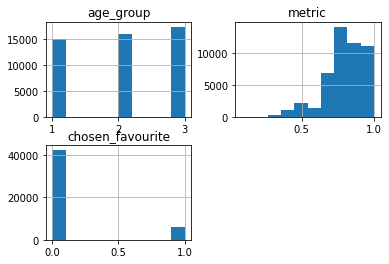

In [2]:
data = HomeAppliancesData(data_path='../data/home_appliances/')
ratings = data.get_ratings_with_metadata()
ratings.head()
ratings.hist()

<AxesSubplot:xlabel='chosen_brand'>

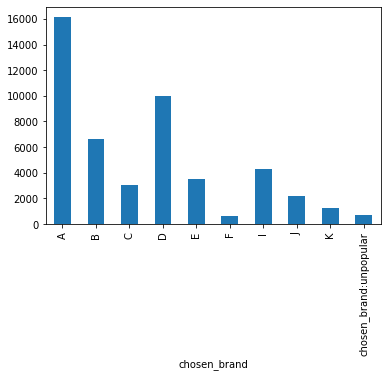

In [3]:
ratings.groupby(['chosen_brand'])['metric'].count().plot(kind='bar')

<AxesSubplot:xlabel='favourite_brand'>

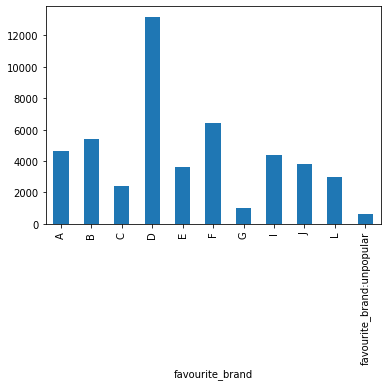

In [4]:
ratings.groupby(['favourite_brand'])['metric'].count().plot(kind='bar')

In [5]:
ratings.groupby(['age_group', 'chosen_favourite']).count()

favourite_brand  chosen_brand  metric
age_group chosen_favourite                                       
1         0                           13090         13090   13090
          1                            1910          1910    1910
2         0                           14070         14070   14070
          1                            1930          1930    1930
3         0                           15380         15380   15380
          1                            2020          2020    2020

### Analyze bias for the dataset

root=[]: 0.793
├── chosen_brand=['A', 'C', 'K', 'chosen_brand:unpopular']: 0.826
│   ├── age_group=[1]: 0.827
│   ├── age_group=[2]: 0.829
│   └── age_group=[3]: 0.821
├── chosen_brand=['B']: 0.65
│   ├── age_group=[1]: 0.654
│   └── age_group=[2, 3]: 0.647
├── chosen_brand=['D', 'F']: 0.839
│   ├── age_group=[1, 2]: 0.834
│   └── age_group=[3]: 0.848
├── chosen_brand=['E']: 0.794
└── chosen_brand=['I', 'J']: 0.755



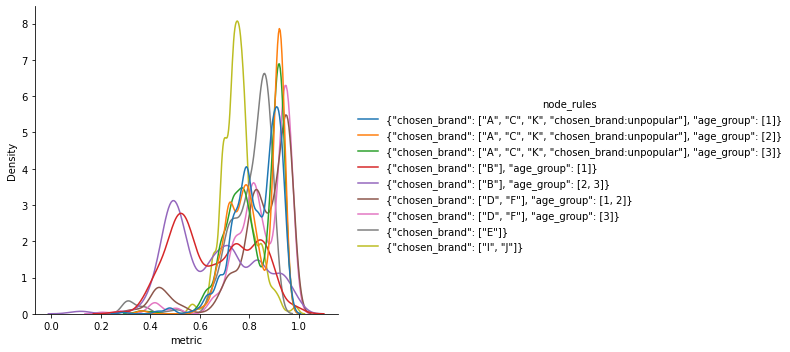

,count,mean,std,min,25%,50%,75%,max,global
node_rules,,,,,,,,,
"{""chosen_brand"": [""B""], ""age_group"": [2, 3]}",4360.0,0.647058,0.173772,0.085086,0.493016,0.644836,0.792735,1.000000,0.792515
"{""chosen_brand"": [""B""], ""age_group"": [1]}",2290.0,0.654418,0.159175,0.270825,0.521657,0.646362,0.802424,0.999461,0.792515
"{""chosen_brand"": [""I"", ""J""]}",6520.0,0.754599,0.063653,0.551111,0.714260,0.752634,0.783768,0.989787,0.792515
"{""chosen_brand"": [""E""]}",3510.0,0.793610,0.113075,0.299208,0.746301,0.829200,0.866593,0.907075,0.792515
"{""chosen_brand"": [""A"", ""C"", ""K"", ""chosen_brand:unpopular""], ""age_group"": [3]}",7480.0,0.821358,0.101143,0.342626,0.743650,0.825321,0.915700,0.952389,0.792515
"{""chosen_brand"": [""A"", ""C"", ""K"", ""chosen_brand:unpopular""], ""age_group"": [1]}",6690.0,0.827395,0.094021,0.290519,0.770668,0.837481,0.904978,0.958155,0.792515
"{""chosen_brand"": [""A"", ""C"", ""K"", ""chosen_brand:unpopular""], ""age_group"": [2]}",6940.0,0.828988,0.096322,0.356523,0.752067,0.835476,0.918356,0.955851,0.792515
"{""chosen_brand"": [""D"", ""F""], ""age_group"": [1, 2]}",6630.0,0.833646,0.148961,0.286609,0.801162,0.869615,0.949487,0.971372,0.792515
"{""chosen_brand"": [""D"", ""F""], ""age_group"": [3]}",3980.0,0.847512,0.123327,0.205909,0.794825,0.867637,0.947253,0.974167,0.792515


In [6]:
METRIC_NAME = 'metric'
bias_detection_tree = BiasDetectionTree(min_child_node_size=2000, alpha=0.01, metric_col=METRIC_NAME, 
                                        dataset_name=data.NAME)
node_metric = bias_detection_tree.analyze_bias(attributes=data.attributes_dict, metric_with_metadata=ratings)
node_metric